# CITS4402 Project: Normalisation Technique Ablation Study

### Group Members:

- Jalil Inayat-Hussain (22751096)
- Felix Mavrodoglu (23720305)
- Reilly Evans (23615971)

We will begin this ablation study by training a SVM model on the Histogram of Oriented Gradients (HOG) features of the Daimler training dataset. The training set contains 500 images, 250 human and 250 non-human. All hyperparameters for the HOG feature extraction (including the normalisation technique hyperparameter, which this study focuses on) will be set to the initial values described in the project task statement:

- Preprocessing: No gamma correction
- Gradient Computation: [-1, 0, 1] filter without smoothing
- Orientation Binning: 9 bins
- Cell Size: 8×8 pixels
- Block Size: 16×16 pixels
- Block Normalization: L2-Hys normalization (Lowe-style clipped L2 norm)
- Block Stride: 8-pixel spacing (4-fold coverage of each cell)
- Detection Window Size: 64×128 pixels
- Classifier: Linear SVM

The random seed shall be set for each feature extraction/SVM model in this notebook, to ensure results are comparable and reproducible.

Once the model is trained, we will generate the accuracy, precision, recall, F1 score and confusion matrix for it, allowing for detailed comparisons of the performance once additional models are trained.

In [41]:
# Import project functions
from projectFunctions import formatDataset

# Get the features from the data with default parameters
# formatDataset() has the specified parameters as defaults already
basePaths, baseFeatures, baseLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, randomSeed = 48
)

In [42]:
# Import model training and performance analysis functions
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import cross_val_predict

# Create and train SVM classifier
baseSVM = LinearSVC(random_state = 48)
baseSVM.fit(baseFeatures, baseLabels)

# Get accuracy, precision and recall of SVM using cross-validation
basePredicts = cross_val_predict(
    baseSVM, baseFeatures, baseLabels, cv = 5
)
baseAccuracy = accuracy_score(baseLabels, basePredicts)
basePrecision = precision_score(baseLabels, basePredicts)
baseRecall = recall_score(baseLabels, basePredicts)
baseFOne = f1_score(baseLabels, basePredicts)

# Display performance metrics
print('Default HOG Parameter Scores:')
print(f'Accuracy:  {baseAccuracy:.6}')
print(f'Precision: {basePrecision:.6}')
print(f'Recall:    {baseRecall:.6}')
print(f'F1 Score:  {baseFOne:.6}')

Default HOG Parameter Scores:
Accuracy:  0.912
Precision: 0.899225
Recall:    0.928
F1 Score:  0.913386


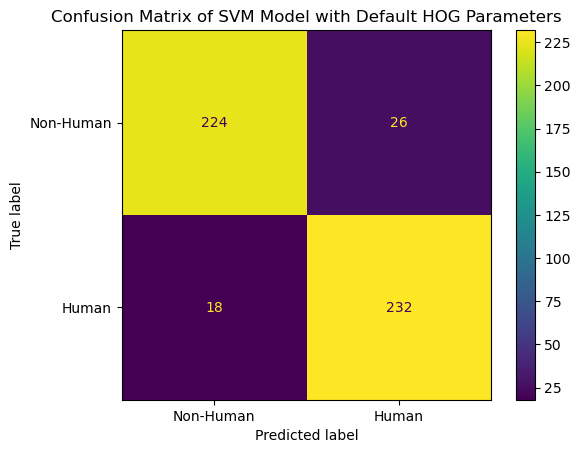

In [43]:
# Import confusion matrix and matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    baseLabels, basePredicts,
    display_labels = ['Non-Human', 'Human']
)
plt.title('Confusion Matrix of SVM Model with Default HOG Parameters')
plt.show()

The default HOG parameters use L2-Hys normalisation, which applies Lowe-style clipping to the Euclidean norm. The scikit-image `hog()` function used for our feature extraction allows for 3 additional normalisation techniques:

- L1 (Manhattan norm with no additional processing)
- L1-sqrt (Square root of Manhattan norm)
- L2 (Euclidean norm with no additional processing)

We will now fit 3 additional SVM models using HOG features generated with these normalisation techniques. Besides the technique, all other parameters (including the random seed) will be set to the same values as the base model, ensuring that no additional factors affect the results.

In [44]:
# Get features with different normalisation techniques
# L1 normalisation
lOnePaths, lOneFeatures, lOneLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1'
)

# L1-sqrt normalisation
sqrtPaths, sqrtFeatures, sqrtLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1-sqrt'
)

# L2 normalisation
lTwoPaths, lTwoFeatures, lTwoLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L2'
)

With the new models trained, we will calculate the same performance metrics that were used for the base model. Additionally, we will use a pandas DataFrame to display these metrics in a single, easily understood table.

In [45]:
# Create and train SVM classifiers for each technique
lOneSVM = LinearSVC(random_state = 48)
lOneSVM.fit(lOneFeatures, lOneLabels)

sqrtSVM = LinearSVC(random_state = 48)
sqrtSVM.fit(sqrtFeatures, sqrtLabels)

lTwoSVM = LinearSVC(random_state = 48)
lTwoSVM.fit(lTwoFeatures, lTwoLabels)

# Get accuracy, precision, recall and F1 of SVM with different norms
# L1 normalisation
lOnePredicts = cross_val_predict(
    lOneSVM, lOneFeatures, lOneLabels, cv = 5
)
lOneAccuracy = accuracy_score(lOneLabels, lOnePredicts)
lOnePrecision = precision_score(lOneLabels, lOnePredicts)
lOneRecall = recall_score(lOneLabels, lOnePredicts)
lOneFOne = f1_score(lOneLabels, lOnePredicts)

# L1-sqrt normalisation
sqrtPredicts = cross_val_predict(
    sqrtSVM, sqrtFeatures, sqrtLabels, cv = 5
)
sqrtAccuracy = accuracy_score(sqrtLabels, sqrtPredicts)
sqrtPrecision = precision_score(sqrtLabels, sqrtPredicts)
sqrtRecall = recall_score(sqrtLabels, sqrtPredicts)
sqrtFOne = f1_score(sqrtLabels, sqrtPredicts)

# L2 normalisation
lTwoPredicts = cross_val_predict(
    lTwoSVM, lTwoFeatures, lTwoLabels, cv = 5
)
lTwoAccuracy = accuracy_score(lTwoLabels, lTwoPredicts)
lTwoPrecision = precision_score(lTwoLabels, lTwoPredicts)
lTwoRecall = recall_score(lTwoLabels, lTwoPredicts)
lTwoFOne = f1_score(lTwoLabels, lTwoPredicts)

In [46]:
# Import pandas
import pandas as pd

# Convert model metrics into DataFrame for easy display
techniqueNames = ['L1', 'L1-sqrt', 'L2', 'L2-Hys (Base)']
techniqueMetrics = [
    [lOneAccuracy, lOnePrecision, lOneRecall, lOneFOne],
    [sqrtAccuracy, sqrtPrecision, sqrtRecall, sqrtFOne],
    [lTwoAccuracy, lTwoPrecision, lTwoRecall, lTwoFOne],
    [baseAccuracy, basePrecision, baseRecall, baseFOne]
]
scoreTypes = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
modelScores = pd.DataFrame(
    techniqueMetrics, index = techniqueNames, columns = scoreTypes
)
modelScores.style.set_caption(
    'Performance Scores of Different Normalisation Techniques'
)

,Accuracy,Precision,Recall,F1 Score
L1,0.904000,0.885496,0.928000,0.906250
L1-sqrt,0.912000,0.902344,0.924000,0.913043
L2,0.916000,0.909449,0.924000,0.916667
L2-Hys (Base),0.912000,0.899225,0.928000,0.913386


These results show interesting similarities in the scores of each normalisation technique. For accuracy, precision and F1 score, the unmodified L2 norm's model has the highest scores while the unmodified L1 model has the lowest. However, recall score is unique in that the L1 model and the original L2-Hys model tie for the highest score at 0.928, while the L2 and L1-sqrt models tie for lowest at 0.924. L1-sqrt and L2-Hys have fairly close scores for accuracy, precision and F1; L1-sqrt has higher precision, L2-Hys has higher F1, and they tie for accuracy.

To get a better understanding of the model performances and possibly understand the reason for the patterns observed in them, we will now plot confusion matrices for each model.

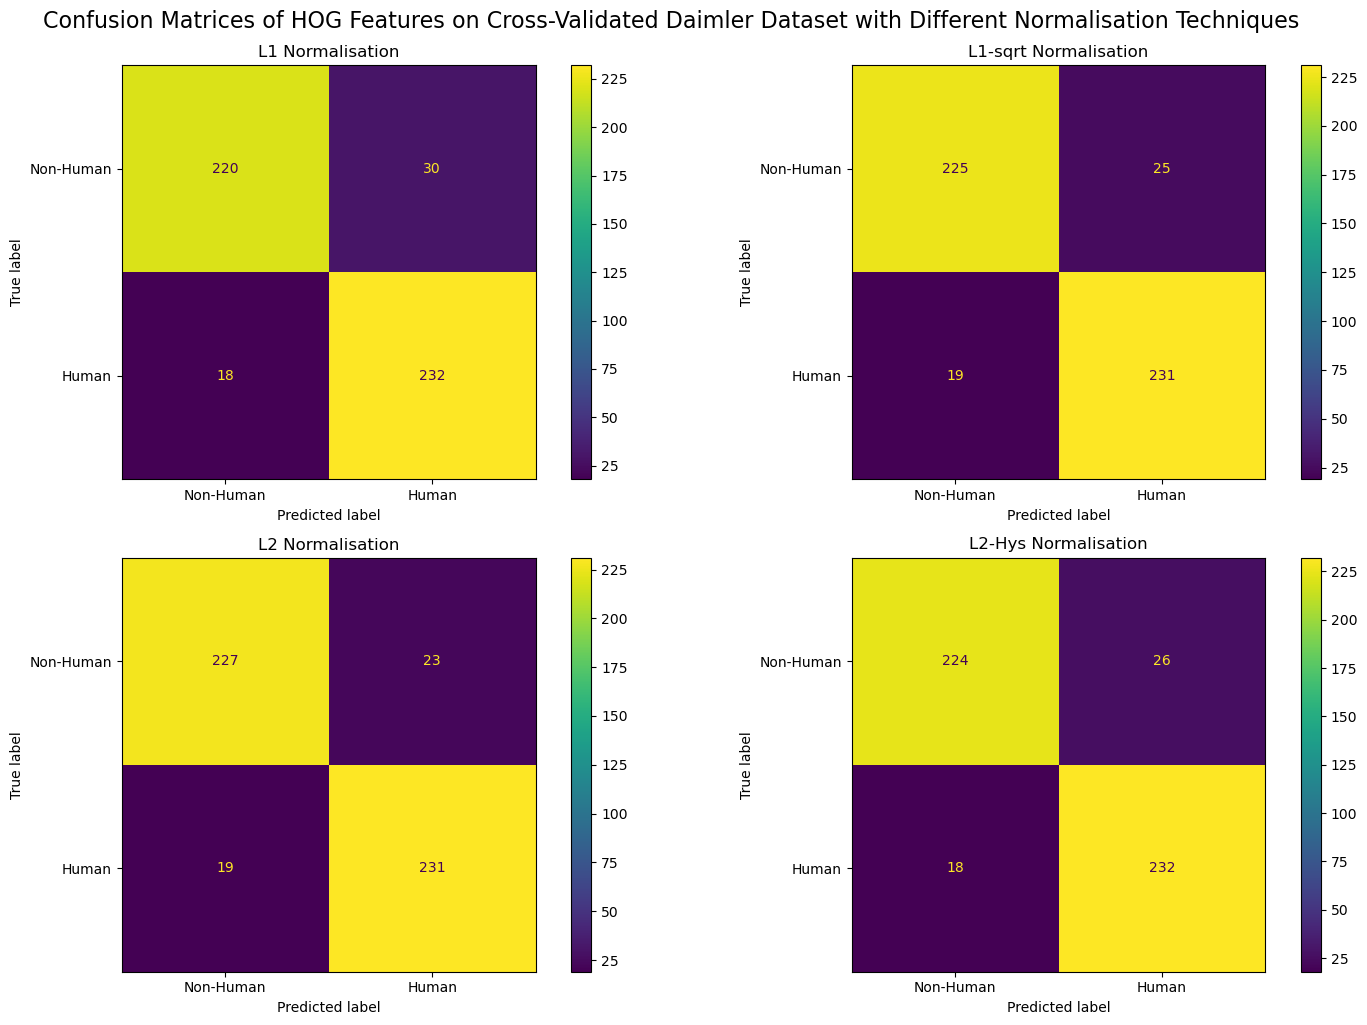

In [47]:
# Display confusion matrices for each normalisation technique
confusionFig, ((lOneAxes, sqrtAxes), (lTwoAxes, baseAxes)) = plt.subplots(
    nrows=2, ncols=2, figsize=(15,10)
)

# L1 normalisation
ConfusionMatrixDisplay.from_predictions(
    lOneLabels, lOnePredicts,
    display_labels = ['Non-Human', 'Human'], ax = lOneAxes
)
lOneAxes.set_title('L1 Normalisation')

# L1-sqrt normalisation
ConfusionMatrixDisplay.from_predictions(
    sqrtLabels, sqrtPredicts,
    display_labels = ['Non-Human', 'Human'], ax = sqrtAxes
)
sqrtAxes.set_title('L1-sqrt Normalisation')

# L2 normalisation
ConfusionMatrixDisplay.from_predictions(
    lTwoLabels, lTwoPredicts,
    display_labels = ['Non-Human', 'Human'], ax = lTwoAxes
)
lTwoAxes.set_title('L2 Normalisation')

# L2-Hys normalisation (default, repeated for easy comparison)
ConfusionMatrixDisplay.from_predictions(
    baseLabels, basePredicts,
    display_labels = ['Non-Human', 'Human'], ax = baseAxes
)
baseAxes.set_title('L2-Hys Normalisation')

plt.tight_layout()
confusionFig.suptitle(
    'Confusion Matrices of HOG Features on Cross-Validated Daimler Dataset '
    'with Different Normalisation Techniques', fontsize = 16, y = 1.02
)
plt.show()

These confusion matrices explain several of the observations from the previous performance metrics.

- For the human/positive instances, the L1 and L2-Hys models made 232 true positives out of 250, while the L1-sqrt and L2 models only got 231; this demonstrates why these two models had identical recall.
- For non-human/negative instances, L2 had the most true negatives at 227 out of 250, with L1-sqrt, L2-Hys and L1 following with 225, 224 and only 220 true negatives respectively. L1's high false positive rate explains why its precision was lower than the other models; additionally, the true negatives differing by more than 1 sample between models explains why precision varied more than recall (and why the precision and F1 score rankings were the same).

In [48]:
# Report-esque DET graphs

placeholder, discuss DET graphs and final technique selection here